In [41]:
#Estudo de caso 5 do curso de Introduação à Ciência de Dados Aplicada à Cibersegurança

#Importando bibliotecas básicas

import numpy as np # vetores e matrizes 
import pandas as pd # processamento dos dados, arquivo CSV I/O (e.g. pd.read_csv)
import tensorflow as tf


In [42]:
# Importando a base de dados para o pandas

sms = pd.read_csv("data/spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                  names=["label", "message"])
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [43]:
sms.label = sms.label.map({"ham":0, "spam":1})

In [44]:
# mais casos negativos (ham) que positivos (spams) 
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [45]:
#Dividindo a base em treino e teste
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(sms.message, 
                                                                            sms.label, 
                                                                            test_size=0.2)

In [46]:
# Criando o documento de treino

from sklearn.feature_extraction.text import CountVectorizer

couvec = CountVectorizer()
couvec.fit(features_train)

CountVectorizer()

In [47]:
# número de características ou tokens
trained_features = couvec.get_feature_names_out()
print("Número de características vetorizadas:", len(trained_features))
print("Exemplos de características treinadas:", trained_features[1:10])

Número de características vetorizadas: 7715
Exemplos de características treinadas: ['000' '000pes' '008704050406' '0089' '0121' '01223585334' '0125698789'
 '02' '0207']


In [48]:
# tokenized train documents

dtm_train = couvec.fit_transform(features_train)
print("Shape of dtm_train:", dtm_train.shape)
print(dtm_train[0:2]) # first two rows of sparse matrix

Shape of dtm_train: (4457, 7715)
  (0, 4757)	1
  (0, 3335)	2
  (0, 2577)	1
  (0, 2932)	1
  (0, 985)	1
  (0, 2172)	1
  (0, 4571)	1
  (0, 1899)	1
  (0, 3623)	1
  (0, 6322)	1
  (0, 7365)	1
  (0, 4381)	1
  (0, 7658)	1
  (0, 6212)	1
  (0, 4096)	1
  (0, 6775)	2
  (0, 6561)	1
  (0, 5550)	1
  (0, 967)	1
  (0, 4049)	1
  (0, 7664)	1
  (0, 7555)	1
  (0, 1121)	1
  (0, 1411)	2
  (0, 1264)	1
  :	:
  (1, 6775)	1
  (1, 967)	1
  (1, 7664)	1
  (1, 7194)	1
  (1, 7472)	1
  (1, 5003)	1
  (1, 264)	1
  (1, 4984)	1
  (1, 5507)	1
  (1, 6650)	1
  (1, 5072)	1
  (1, 4912)	1
  (1, 6996)	1
  (1, 4868)	1
  (1, 4088)	1
  (1, 5969)	1
  (1, 3147)	1
  (1, 6892)	1
  (1, 678)	1
  (1, 4820)	1
  (1, 313)	1
  (1, 4599)	1
  (1, 5554)	1
  (1, 2118)	1
  (1, 141)	1


In [49]:
# tokenized test documents

dtm_test = couvec.transform(features_test)
print("Shape of dtm_test:", dtm_test.shape)

Shape of dtm_test: (1115, 7715)


In [50]:
# Construíndo e avaliando o modelo 

# Multimodal Naive Bayes 
# O classificador multimodal Naive Bays é útil para classificar características discretas. 
# (e.g., número de palavras para classificação de textos). 
# A distribuição multimodal requer geralmente contadores inteiros como features.

# Importando e instanciando o modelo Nayve Bayes Multimodal
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [51]:
# Treinando o modelo

nb.fit(dtm_train, labels_train)

MultinomialNB()

In [52]:
# Fazendo predições

labels_pred = nb.predict(dtm_test)

In [53]:
# Acurácia
from sklearn import metrics
metrics.accuracy_score(labels_test, labels_pred)

0.9856502242152466

In [54]:
# Criando a matrix de confusão para precisão e recall (essas são duas outrss métricas de avaliação) 
metrics.confusion_matrix(labels_test, labels_pred)

array([[952,   7],
       [  9, 147]])

In [55]:
# Percentagem do total de spams detectados i.e.recall
print("Recall:", metrics.recall_score(labels_test, labels_pred))

# Percentagem das predições positivas (spams) corretas, i.e. precisão
print("Precisão:", metrics.precision_score(labels_test, labels_pred))

Recall: 0.9423076923076923
Precisão: 0.9545454545454546


In [56]:
print("Ordem das classes no predict_proba:", nb.classes_)
print("Exemplos de probabilidades de classes:", nb.predict_proba(dtm_test)[0])


Ordem das classes no predict_proba: [0 1]
Exemplos de probabilidades de classes: [9.99999309e-01 6.90865459e-07]


In [57]:
# Uma vez que somente ~15% dos rótulos são positivos (spam), a curva precisão-recall é mais informativa que
# a curva ROC

labels_prob = nb.predict_proba(dtm_test)[:, 1]
precisions, recalls, thresholds = metrics.precision_recall_curve(labels_test, labels_prob)

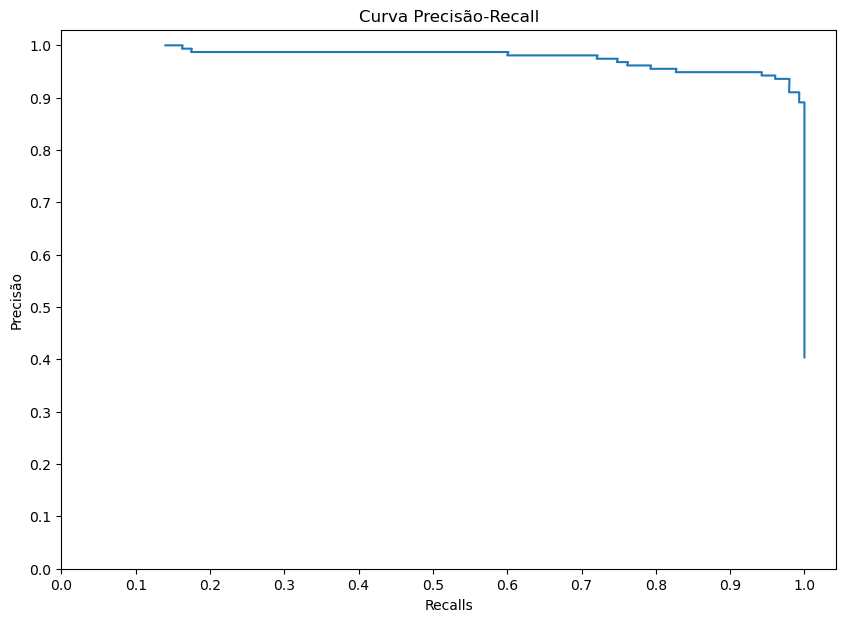

In [58]:
# Plotando a curva precisão-recall 

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(precisions[:-1], recalls[:-1])
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precisão")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curva Precisão-Recall")
plt.show()